In [77]:
import numpy as np
import pandas as pd

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

### Import data 

In [79]:
data_df = pd.read_csv('./data.csv')

In [80]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Data Imputation (Missing Data Replacement)
Datasets often have missing values and this can cause problems for machine learning algorithms. It is considered good practise to identify and replace missing values in each column of your dateset prior to performing predictive modelling. This method of missing data replacement is referred to as data imputation.

In [81]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [82]:
data_df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [83]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data / len(data_df) * 100
    print(f'column : {col} has {missing_percent}%')

column : Country has 0.0%
column : Age has 10.0%
column : Salary has 10.0%
column : Purchased has 0.0%


In [84]:
data_df.isna()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


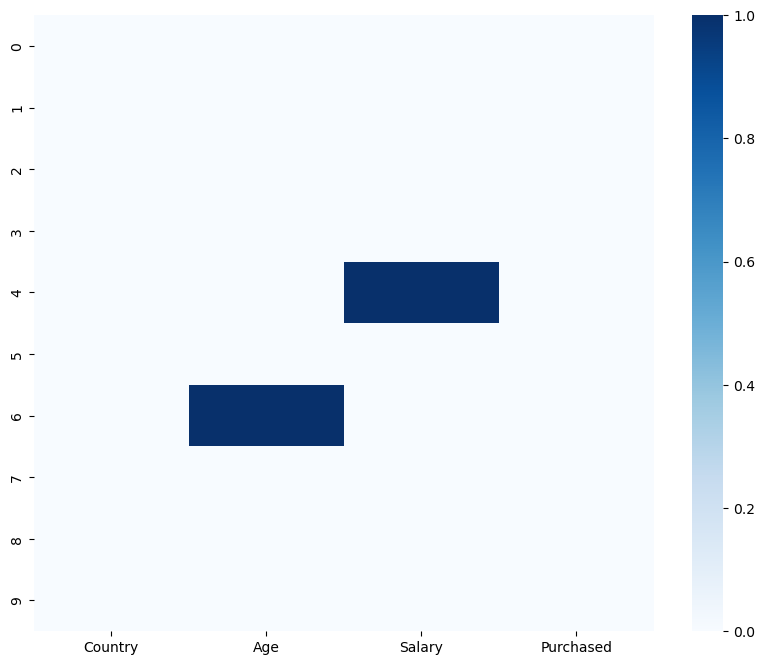

In [85]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data_df.isna(), cmap = 'Blues');

In [86]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [87]:
X = data_df.iloc[:, : -1]
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [88]:
# chuyển từ dạng df về dạng numpy tiện cho quá trình train model
X = X.values

In [89]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [90]:
Y = data_df.iloc[:,-1].values

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
#create an instance of class SimpleImputer : np.nan is the empty value in dataset
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#strategy là giá trị thay thế các giá trị missingvalue

In [93]:
#chỉ lấy cột 2 và 3
imputer.fit(X[:,1:3])

SimpleImputer()

In [94]:
X[:,1:3] = imputer.transform(X[:,1:3]) 

In [95]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data
Mã hóa dữ liệu danh mục

#### Encode Independent variable (X)

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #mã hóa theo kiểu onehot


ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = "passthrough")# có thể có nhiều transformer đặt trong list
# được áp dụng cho cột có chỉ số 0
X = ct.fit_transform(X)

In [97]:
 X # France, Ger, Spain, Age, Salary) 

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent Variable (Y)

In [98]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Splitting the dataset (X = data, y = output) into the Training set and Test set 

In [100]:
from sklearn.model_selection import train_test_split # package hỗ trợ chia dữ liệu thành traindata và testdata

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [101]:
X_train, X_test, y_train, y_test


(array([[1.0, 0.0, 0.0, 35.0, 58000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 30.0, 54000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 50.0, 83000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object),
 array([1, 0, 1, 0, 1, 1, 0, 0]),
 array([0, 1]))

In [102]:
y_train.shape

(8,)

## Feature Scaling

### Standardisation

Sử dụng khi phân phối dữ liệu gần với phân phối chuẩn (normal distribution).
Các thuật toán yêu cầu dữ liệu có độ biến thiên tương tự giữa các đặc trưng.
Các thuật toán như Support Vector Machines, Linear Regression thường tận dụng tốt từ dữ liệu đã được standardize.

### Normalisation 

Sử dụng khi phân phối của dữ liệu không đồng đều và không tuân theo phân phối chuẩn.
Các thuật toán như k-Nearest Neighbors (KNN), Neural Networks thường cần dữ liệu ở dạng normalized.
Normalization chuyển đổi dữ liệu sao cho chúng nằm trong khoảng [0, 1] hoặc [-1, 1].

In [103]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

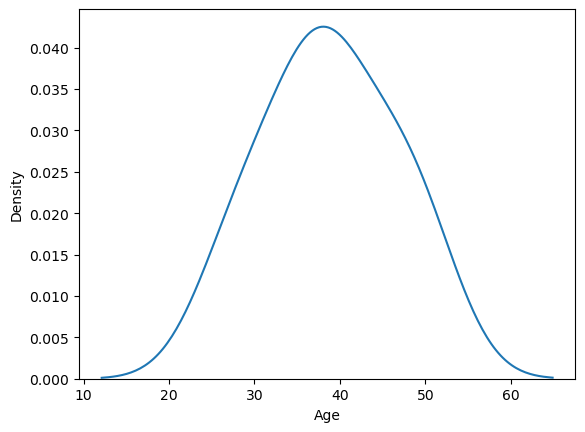

In [104]:
sns.kdeplot(data = data_df.Age)

<Axes: xlabel='Salary', ylabel='Density'>

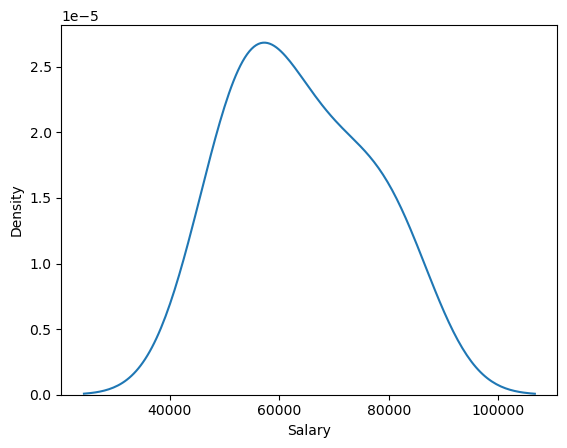

In [105]:
sns.kdeplot(data = data_df.Salary)

In [106]:
sc = StandardScaler()

X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

In [107]:
X_train[:, 3:]

array([[-0.7529426005471072, -0.6260377781240918],
       [1.008453807952985, 1.0130429500553495],
       [1.7912966561752484, 1.8325833141450703],
       [-1.7314961608249362, -1.0943465576039322],
       [-0.3615211764359756, 0.42765697570554906],
       [0.22561095973072184, 0.05040823668012247],
       [-0.16581046438040975, -0.27480619351421154],
       [-0.013591021670525094, -1.3285009473438525]], dtype=object)

In [108]:
# sử dụng mean và var cảu bộ train để chuẩn hóa bộ test

X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [109]:
X_test[:, 3:]

array([[2.1827180802863797, 2.3008920936249107],
       [-2.3186282969916334, -1.7968097268236927]], dtype=object)